1 лабораторная работа.

### 0. Описание задачи.

Датасет включает данные о более чем 100 000 бронирований отелей за период с июля 2015 по август 2017 год. Основная задача — на основе предоставленной информации предсказать вероятность отмены бронирования.

Импортируем необходимые для работы библиотеки:

In [3]:
import numpy
import pandas as pd
import matplotlib.pyplot
import seaborn
import sklearn
import sklearn.model_selection
import sklearn.neighbors
import sklearn.ensemble
import sklearn.linear_model
import sklearn.neural_network

### 1. Чтение данных.

In [4]:
# Загрузка данных
data = pd.read_csv('C:/Users/notqpe/Desktop/ml/hotel_booking.csv')
# Очистка названий столбцов от лишних пробелов
data.columns = data.columns.str.strip()

data


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


36 признаков:  

1. **hotel** - тип отеля (city hotel или resort hotel).  
2. **is_canceled** - флаг отмены бронирования (1 — отменена, 0 — не отменена).  
3. **lead_time** - количество дней между бронированием и заездом.  
4. **arrival_date_year** - год заезда.  
5. **arrival_date_month** - месяц заезда.  
6. **arrival_date_week_number** - номер недели года для заезда.  
7. **arrival_date_day_of_month** - день месяца для заезда.  
8. **stays_in_weekend_nights** - количество ночей в выходные (суббота и воскресенье).  
9. **stays_in_week_nights** - количество ночей в будние (понедельник — пятница).  
10. **adults** - количество взрослых.  
11. **children** - количество детей.  
12. **babies** - количество младенцев.  
13. **meal** - тип питания (например, bed & breakfast, half board и т.д.).  
14. **country** - страна происхождения гостя (код страны).  
15. **market_segment** - сегмент рынка бронирования (например, direct, corporate, online ta и т.д.).  
16. **distribution_channel** - канал распределения бронирования.  
17. **is_repeated_guest** - флаг повторного гостя (1 — повторный, 0 — новый).  
18. **previous_cancellations** - количество предыдущих отмен бронирований.  
19. **previous_bookings_not_canceled** - количество успешных предыдущих бронирований.  
20. **reserved_room_type** - тип зарезервированного номера.  
21. **assigned_room_type** - тип назначенного номера.  
22. **booking_changes** - количество изменений в бронировании.  
23. **deposit_type** - тип депозита (например, no deposit, non refundable, refundable).  
24. **agent** - id турагентства, сделавшего бронирование.  
25. **company** - id компании, ответственной за бронирование.  
26. **days_in_waiting_list** - количество дней в списке ожидания.  
27. **customer_type** - тип клиента (например, transient, contract, group, transient-party).  
28. **adr** - средняя дневная выручка (average daily rate).  
29. **required_car_parking_spaces** - количество запрошенных парковочных мест.  
30. **total_of_special_requests** - количество специальных запросов (например, дополнительная кровать, вид на море и т.д.).  
31. **reservation_status** - статус бронирования (например, canceled, check-out, no-show).  
32. **reservation_status_date** - дата последнего обновления статуса бронирования.  
33. **name** - имя гостя (анонимизировано).  
34. **email** - электронная почта гостя (анонимизировано).  
35. **phone-number** - номер телефона гостя (анонимизировано).  
36. **credit_card** - номер кредитной карты гостя (анонимизировано).  

Эти признаки описывают различные аспекты бронирования отеля, включая информацию о гостях, детали бронирования и финансовые данные.

Удалим избыточные столбцы из датасета:


In [5]:
del data['reservation_status_date']
del data['country']
del data['reservation_status']
del data['name']
del data['email']
del data['phone-number']
del data['credit_card']


# Удалим избыточные данные о желаемом времени заселения, оставив данные только о номере недели:
del data['arrival_date_year']
del data['arrival_date_month']
del data['arrival_date_day_of_month']

data

,hotel,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,27,0,0,2,0.0,0,BB,...,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0
1,Resort Hotel,0,737,27,0,0,2,0.0,0,BB,...,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0
2,Resort Hotel,0,7,27,0,1,1,0.0,0,BB,...,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0
3,Resort Hotel,0,13,27,0,1,1,0.0,0,BB,...,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0
4,Resort Hotel,0,14,27,0,2,2,0.0,0,BB,...,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,35,2,5,2,0.0,0,BB,...,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0
119386,City Hotel,0,102,35,2,5,3,0.0,0,BB,...,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2
119387,City Hotel,0,34,35,2,5,2,0.0,0,BB,...,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4
119388,City Hotel,0,109,35,2,5,2,0.0,0,BB,...,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0


### 2. Обработка пропущенных значений.

In [6]:
data['meal'].replace({'Undefined': None}, inplace=True)
data['market_segment'].replace({'Undefined': None}, inplace=True)
data['distribution_channel'].replace({'Undefined': None}, inplace=True)

Проверим, в каких столбцах присутствуют пропущенные значения:

In [7]:
data.isna().sum()[data.isna().sum() != 0]

children                     4
meal                      1169
market_segment               2
distribution_channel         5
agent                    16340
company                 112593
dtype: int64

Пропущенные значения в признаках "children", "meal", "market_segment" и "distribution_channel" заполним модой (наиболее часто встречающимся значением):

In [8]:
data['children'].fillna(data['children'].mode()[0], inplace=True)
data['meal'].fillna(data['meal'].mode()[0], inplace=True)
data['market_segment'].fillna(data['market_segment'].mode()[0], inplace=True)
data['distribution_channel'].fillna(data['distribution_channel'].mode()[0], inplace=True)

Признаки "agent" и "company" содержат идентификаторы агентства и компании соответственно. Пропуски в этих данных могут быть связаны с тем, что бронирование было выполнено напрямую, без участия компании или агентства.

In [9]:
data['agent'].fillna(0, inplace=True)
data['company'].fillna(0, inplace=True)

data['agent'] = numpy.where(data['agent'] > 0, 1, 0)
data['company'] = numpy.where(data['company'] > 0, 1, 0)

### 3. Обработка категориальных признаков.

In [10]:
data = pandas.get_dummies(data)

### 4. Визуализация данных.

Проанализируем ключевые метрики для оценки данных:

In [11]:
data.describe()

,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,27.165173,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,0.863138,0.056931,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,13.605138,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,0.343703,0.231712,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,16.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,28.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,38.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,53.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,1.000000,1.000000,391.000000,5400.000000,8.000000,5.000000


Можно выявить подозрительные значения, например, максимальное количество взрослых (adults) составляет 55 человек. Изучим эти записи подробнее:

In [12]:
data[data['adults'] > 10]

,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,...,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
1539,1,304,36,0,3,40,0.0,0,0,0,...,False,False,False,True,False,False,False,True,False,False
1587,1,333,36,2,5,26,0.0,0,0,0,...,False,False,False,True,False,False,False,True,False,False
1643,1,336,37,1,2,50,0.0,0,0,0,...,False,False,False,True,False,False,False,True,False,False
1752,1,340,37,2,5,26,0.0,0,0,0,...,False,False,False,True,False,False,False,True,False,False
1884,1,347,38,2,5,26,0.0,0,0,0,...,False,False,False,True,False,False,False,True,False,False
1917,1,349,39,1,3,27,0.0,0,0,0,...,False,False,False,True,False,False,False,True,False,False
1962,1,352,39,1,3,27,0.0,0,0,0,...,False,False,False,True,False,False,False,True,False,False
2003,1,354,39,2,5,26,0.0,0,0,0,...,False,False,False,True,False,False,False,True,False,False
2164,1,361,40,2,5,26,0.0,0,0,0,...,False,False,False,True,False,False,False,True,False,False
2173,1,338,41,2,0,55,0.0,0,0,0,...,False,False,False,True,False,False,False,True,False,False


Заметно, что все эти бронирования были отменены, и залог по ним не вносился. Эти значения стоит оставить как пример изначально крайне подозрительных случаев.

<Axes: >

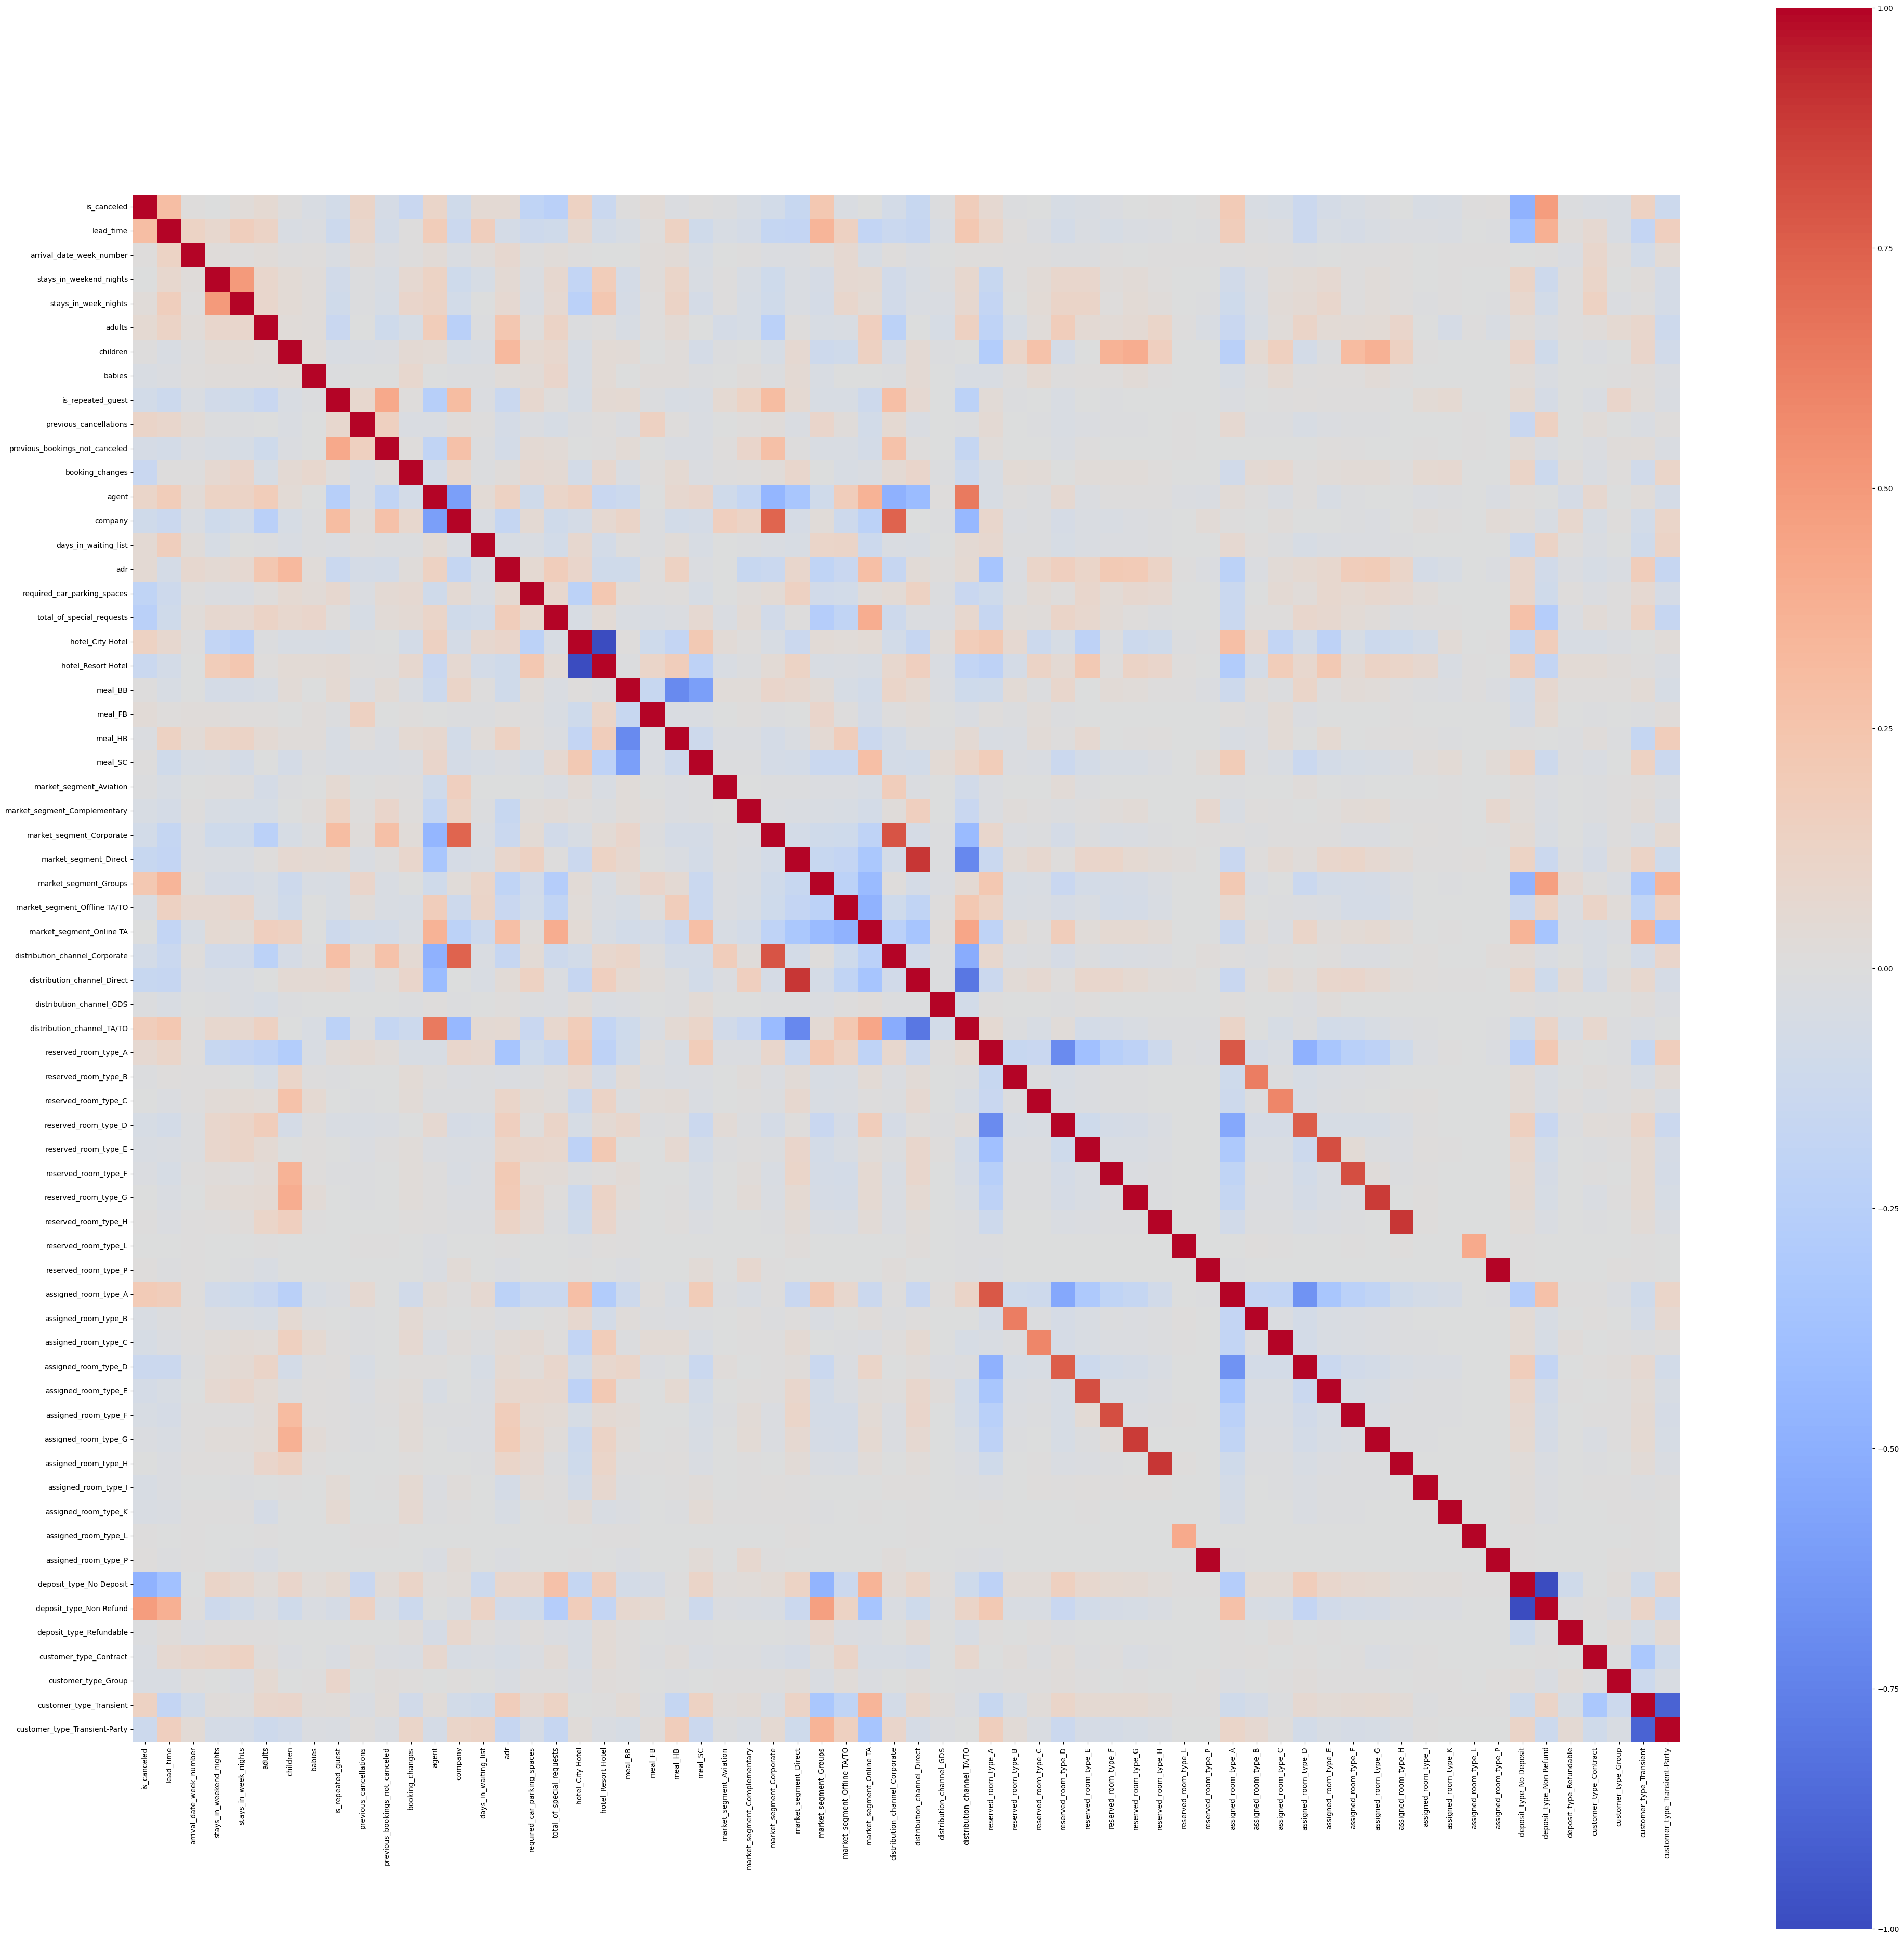

In [13]:
correlation_matrix = data.corr()
matplotlib.pyplot.figure(figsize = (48, 48))
seaborn.heatmap(correlation_matrix, square=True, cmap="coolwarm")

Text(0.5, 1.0, 'Зависимость числа ночей от недели прибытия')

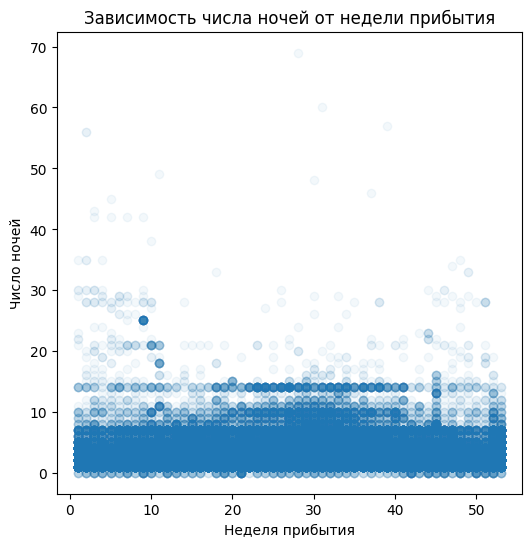

In [14]:
matplotlib.pyplot.figure(figsize = (6, 6), dpi=100)
matplotlib.pyplot.plot(data['arrival_date_week_number'], data['stays_in_week_nights'] + data['stays_in_weekend_nights'], 'o', alpha = 0.05)
matplotlib.pyplot.xlabel('Неделя прибытия')
matplotlib.pyplot.ylabel('Число ночей')
matplotlib.pyplot.title('Зависимость числа ночей от недели прибытия')

### 5. Нормализация признаков.

Для нормализации данных применим метод стандартизации:

In [15]:
dataset_normalized = (data - data.mean(axis = 0)) / data.std(axis = 0)
dataset_normalized.describe()

,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,...,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
count,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,...,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05
mean,-5.332493e-17,3.618477e-17,-1.847328e-16,-1.225997e-17,4.427873e-17,-5.522939e-17,2.571023e-17,-1.356929e-17,4.570708e-17,3.332808e-18,...,-4.761154e-18,-1.577132e-18,4.642125e-18,-1.275989e-16,-6.856062e-17,1.904462e-18,5.713385e-18,2.285354e-17,-1.971118e-16,-1.133155e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-7.670373e-01,-9.733146e-01,-1.923183e+00,-9.288865e-01,-1.310234e+00,-3.204779e+00,-2.606575e-01,-8.157892e-02,-1.815596e-01,-1.031791e-01,...,-4.839766e-02,-2.894117e-03,-1.002598e-02,-2.663593e+00,-3.730734e-01,-3.686095e-02,-1.880071e-01,-6.968738e-02,-1.734775e+00,-5.162559e-01
25%,-7.670373e-01,-8.048748e-01,-8.206585e-01,-9.288865e-01,-7.862039e-01,2.478962e-01,-2.606575e-01,-8.157892e-02,-1.815596e-01,-1.031791e-01,...,-4.839766e-02,-2.894117e-03,-1.002598e-02,3.754296e-01,-3.730734e-01,-3.686095e-02,-1.880071e-01,-6.968738e-02,5.764387e-01,-5.162559e-01
50%,-7.670373e-01,-3.276287e-01,6.136116e-02,7.250190e-02,-2.621733e-01,2.478962e-01,-2.606575e-01,-8.157892e-02,-1.815596e-01,-1.031791e-01,...,-4.839766e-02,-2.894117e-03,-1.002598e-02,3.754296e-01,-3.730734e-01,-3.686095e-02,-1.880071e-01,-6.968738e-02,5.764387e-01,-5.162559e-01
75%,1.303707e+00,5.239281e-01,7.963776e-01,1.073890e+00,2.618573e-01,2.478962e-01,-2.606575e-01,-8.157892e-02,-1.815596e-01,-1.031791e-01,...,-4.839766e-02,-2.894117e-03,-1.002598e-02,3.754296e-01,-3.730734e-01,-3.686095e-02,-1.880071e-01,-6.968738e-02,5.764387e-01,-5.162559e-01
max,1.303707e+00,5.923360e+00,1.898902e+00,1.809749e+01,2.489129e+01,9.174379e+01,2.482997e+01,1.025497e+02,5.507786e+00,3.069024e+01,...,2.066198e+01,3.455257e+02,9.974008e+01,3.754296e-01,2.680415e+00,2.712875e+01,5.318904e+00,1.434968e+01,5.764387e-01,1.937008e+00


### 6. Классификация

Разделим данные на обучающую и тестовую выборки в соотношении 3:1:

In [16]:
x = dataset_normalized.drop(['is_canceled'], axis=1)
y = data['is_canceled']
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.25, random_state=42)

### 7. k ближайших соседей.

4 соседа:

In [18]:
model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=4)
model.fit(x_train.values, y_train.values)
y_train_pred = model.predict(x_train.values)
y_test_pred = model.predict(x_test.values)
print(f'Ошибки:\nОбучающая: {sklearn.metrics.mean_squared_error(y_train, y_train_pred)}, Тестовая: {sklearn.metrics.mean_squared_error(y_test, y_test_pred)}')

Ошибки:
Обучающая: 0.11954166759732862, Тестовая: 0.1706982042347896


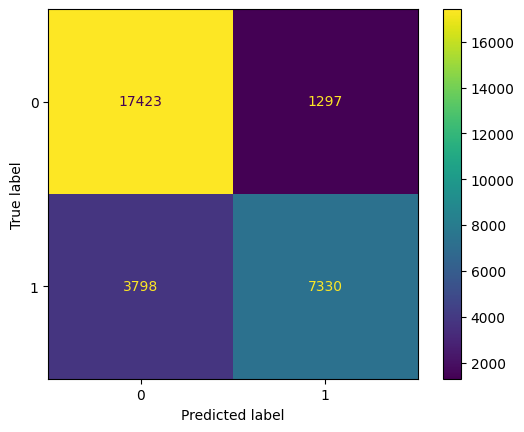

In [19]:
confusion_maxtrix = sklearn.metrics.confusion_matrix(y_test, y_test_pred)
confusion_maxtrix_display = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_maxtrix, display_labels=model.classes_)
confusion_maxtrix_display.plot()
matplotlib.pyplot.show()

8 соседей:

In [20]:
model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=8)
model.fit(x_train.values, y_train.values)
y_train_pred = model.predict(x_train.values)
y_test_pred = model.predict(x_test.values)
print(f'Ошибки:\nОбучающая: {sklearn.metrics.mean_squared_error(y_train, y_train_pred)}, Тестовая: {sklearn.metrics.mean_squared_error(y_test, y_test_pred)}')

Ошибки:
Обучающая: 0.14087243974894462, Тестовая: 0.1714687751273117


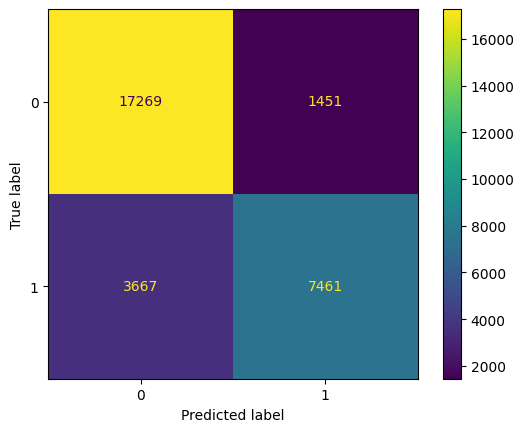

In [21]:
confusion_maxtrix = sklearn.metrics.confusion_matrix(y_test, y_test_pred)
confusion_maxtrix_display = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_maxtrix, display_labels=model.classes_)
confusion_maxtrix_display.plot()
matplotlib.pyplot.show()

Выполним подбор оптимального количества ближайших соседей:

In [22]:
model = sklearn.neighbors.KNeighborsClassifier()
grid = sklearn.model_selection.GridSearchCV(model, param_grid = {'n_neighbors': range(1, 11)}, cv=10)
grid.fit(x_train.values, y_train.values)
print(f"Оптимальное количество соседей: {grid.best_params_['n_neighbors']}")

best_model = grid.best_estimator_
y_train_pred = best_model.predict(x_train.values)
y_test_pred = best_model.predict(x_test.values)
print(f'\nОшибки:\nОбучающая: {sklearn.metrics.mean_squared_error(y_train, y_train_pred)}, Тестовая: {sklearn.metrics.mean_squared_error(y_test, y_test_pred)}')

Оптимальное количество соседей: 4

Ошибки:
Обучающая: 0.11954166759732862, Тестовая: 0.1706982042347896


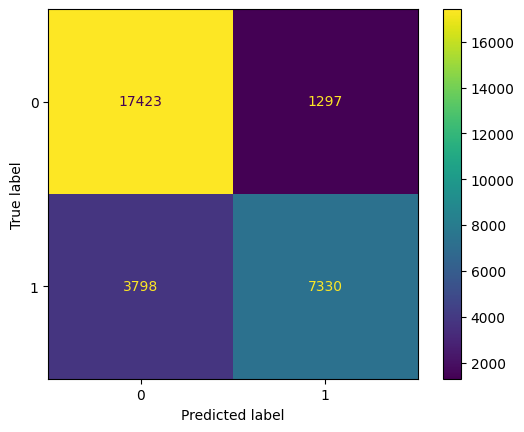

In [23]:
confusion_maxtrix = sklearn.metrics.confusion_matrix(y_test, y_test_pred)
confusion_maxtrix_display = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_maxtrix, display_labels=best_model.classes_)
confusion_maxtrix_display.plot()
matplotlib.pyplot.show()

### Вывод.

1. Обученные алгоритмы эффективно справляются с предсказанием негативных случаев, однако часто ошибаются в определении позитивных.
2. Увеличение количества соседей привело к незначительному снижению точности модели.

2 лабораторная работа.

### 1. Подготовка данных.

Запомним целевую метку в переменой target, после чего - удалим её и нормализуем данные:

In [33]:
from sklearn.preprocessing import StandardScaler

target = data['is_canceled']  # Целевая переменная
features  = data.drop(columns=['is_canceled'])

# Нормализуем данные
scaler = StandardScaler()
features_scaled  = scaler.fit_transform(features)

### 2. Применение PCA.

Для визуализации и уменьшения размерности данных применим метод PCA:

In [34]:
from sklearn.decomposition import PCA

# Применение PCA
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

### 3. Кластеризация.

#### 3.1. KMeans:

In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Кластеризация KMeans
kmeans_model = KMeans(n_clusters=2, random_state=42)
kmeans_clusters = kmeans_model.fit_predict(features_scaled)

# Оценка
kmeans_ari = adjusted_rand_score(target, kmeans_clusters)
print(f"KMeans Adjusted Rand Index: {kmeans_ari}")

KMeans Adjusted Rand Index: 0.05506281389535095


#### 3.2. DBSCAN:

In [36]:
from sklearn.cluster import DBSCAN

# Кластеризация DBSCAN
dbscan_model = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan_model.fit_predict(features_scaled)

# Оценка
dbscan_ari = adjusted_rand_score(target, dbscan_clusters)
print(f"DBSCAN Adjusted Rand Index: {dbscan_ari}")

DBSCAN Adjusted Rand Index: 0.11005112451452789


#### 3.2. HDBSCAN:

In [37]:
import hdbscan
from sklearn.metrics import adjusted_rand_score

# Кластеризация HDBSCAN
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=5)
hdbscan_clusters = hdbscan_model.fit_predict(features_pca)

# Оценка качества кластеризации
hdbscan_ari = adjusted_rand_score(target, hdbscan_clusters)
print(f"HDBSCAN Adjusted Rand Index: {hdbscan_ari}")

HDBSCAN Adjusted Rand Index: 0.03302287656474518


#### 4. Визуализация кластеров.

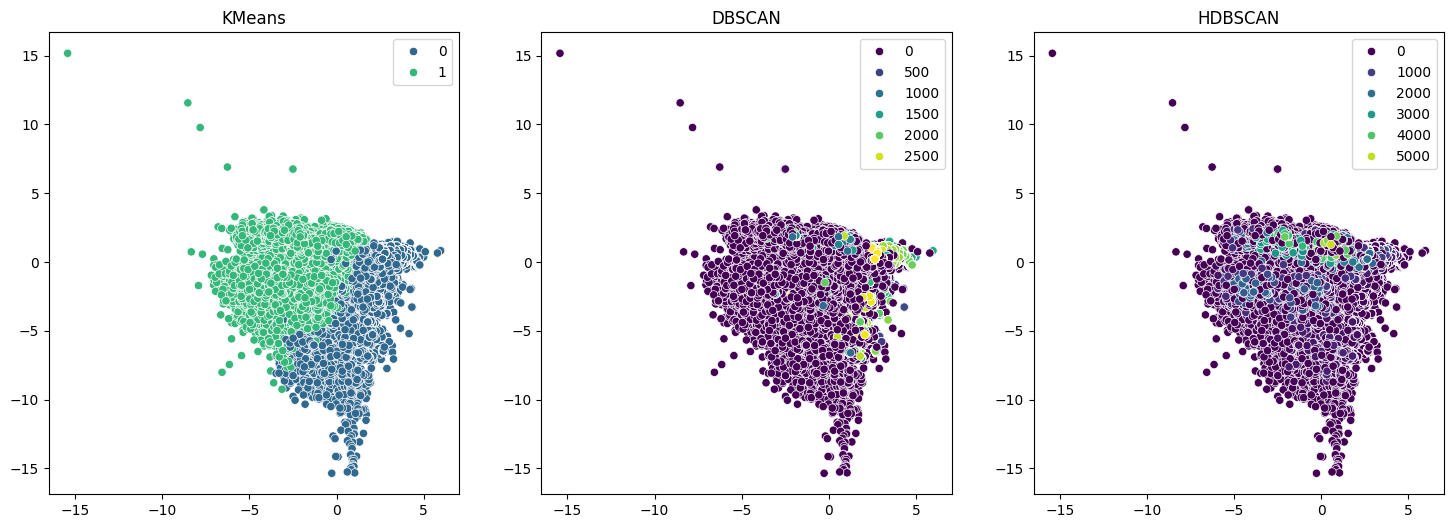

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns


# Создание графиков
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Визуализация для KMeans
sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1], hue=kmeans_clusters, palette="viridis", ax=axs[0])
axs[0].set_title("KMeans")

# Визуализация для DBSCAN
sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1], hue=dbscan_clusters, palette="viridis", ax=axs[1])
axs[1].set_title("DBSCAN")

# Визуализация для HDBSCAN
sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1], hue=hdbscan_clusters, palette="viridis", ax=axs[2])
axs[2].set_title("HDBSCAN")

plt.show()

### 5. Вывод.
На основе значений Adjusted Rand Index (ARI) для различных алгоритмов кластеризации можно сделать вывод, что **DBSCAN** показал наилучшее качество кластеризации с ARI, равным **0.110**, что значительно выше, чем у KMeans (ARI = **0.055**) и HDBSCAN (ARI = **0.033**). Это указывает на то, что DBSCAN лучше учитывает структуру данных и более точно выделяет кластеры. KMeans, хотя и уступает DBSCAN, демонстрирует приемлемый результат, в то время как HDBSCAN оказался наименее эффективным для данного набора данных. Таким образом, выбор алгоритма кластеризации существенно влияет на качество результатов, и DBSCAN в данном случае является предпочтительным методом.